A Morelet wavelet is composed of a Gaussian window function (envelope) and a complex exponential.

A filter bank is a collection of band filters that separate the input signal into low/high freqs.
A constant Q filter is the set of $\psi_{\omega, Q}$, where 

#### $ \psi_{\omega, Q} = \frac{\omega}{\sqrt{2\pi Q}} e^{-\omega^2 t^2 / 2 Q^2} e^{- 2\pi i \omega t}$

### Q2

In [77]:
pip install kymatio

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interact
import scipy as sp

In [105]:
T=8192

J=6

Q=(16,16)

import kymatio.scattering1d.filter_bank as fb
res=fb.scattering_filter_factory(8192,J, Q, T)
sys.getsizeof(res)

64

### Q3

In [109]:
print(res)
res[1][2]['levels'][0] # 62 is the index of the filter at scale 1

({'levels': [array([1.00000000e+000, 1.92874985e-022, 1.38389653e-087, ...,
       3.69388307e-196, 1.38389653e-087, 1.92874985e-022]), array([5.00000000e-001, 9.64374924e-023, 6.91948263e-088, ...,
       1.84694153e-196, 6.91948263e-088, 9.64374924e-023]), array([2.50000000e-001, 4.82187462e-023, 3.45974132e-088, ...,
       9.23470767e-197, 3.45974132e-088, 4.82187462e-023]), array([1.25000000e-001, 2.41093731e-023, 1.72987066e-088, ...,
       4.61735384e-197, 1.72987066e-088, 2.41093731e-023]), array([6.25000000e-002, 1.20546865e-023, 8.64935329e-089, 2.30867692e-197,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00

array([ 0.000e+000,  6.522e-322,  1.675e-321, ..., -9.190e-322,
       -7.263e-322, -4.447e-322])

In [111]:
# Plot the first-order wavelets in the frequency domain

def first_order_wavelets(i=62):
    plt.plot(np.linspace(0,1,T), res[1][i]['levels'][0], label=f'Wavelet {i+1}')
    plt.xscale('log')
    plt.xlabel('$log(Frequency)$')
    plt.ylabel('Magnitude')
    plt.title('First-Order Wavelets in the Frequency Domain')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create sliders to interact with the plot
interact(first_order_wavelets, i=(0, 62, 1))


interactive(children=(IntSlider(value=62, description='i', max=62), Output()), _dom_classes=('widget-interact'…

<function __main__.first_order_wavelets(i=62)>

### Q4

In [112]:
# Inverse Fourier transform the first-order wavelets
inversed = np.fft.ifft(res[1][60]['levels'][0])
inversed.shape

(8192,)

In [113]:
time=np.linspace(0, 1, T)
time.shape

(8192,)

In [124]:
# Plot the first-order wavelets in the time domain
def inversed_first_order(i=62):
    time=np.linspace(1, 10**2, T)
    inversed = np.fft.ifft(res[1][i]['levels'][0])
    inversed=inversed.real
    inversed=np.fft.ifftshift(inversed)
    plt.plot(time, inversed, label=f'Wavelet {i+1}')
    #plt.xscale('log')
    plt.xlabel('$Time$')
    plt.ylabel('Magnitude')
    plt.title('First-Order Wavelets in the Time Domain')
    plt.legend()
    plt.grid(True)
    plt.xlim(40,60)
    plt.show()


# Create sliders to interact with the plot
interact(inversed_first_order, i=(0, 62, 1))

interactive(children=(IntSlider(value=62, description='i', max=62), Output()), _dom_classes=('widget-interact'…

<function __main__.inversed_first_order(i=62)>

### Q5

In [123]:
# Plot the second-order wavelets in the time domain
def inversed_second_order(i=62):
    time=np.linspace(1, 10**2, T)
    inversed2 = np.fft.ifft(res[2][i]['levels'][0])
    inversed2=inversed2.real
    inversed2=np.fft.ifftshift(inversed2)
    plt.plot(time, inversed2, label=f'Wavelet {i+1}')
    #plt.xscale('log')
    plt.xlabel('$Time$')
    plt.ylabel('Magnitude')
    plt.title('Second-Order Wavelets in the Time Domain')
    plt.legend()
    plt.grid(True)
    plt.xlim(40,60)
    plt.show()

# Create sliders to interact with the plot
interact(inversed_second_order, i=(0, 62, 1))

interactive(children=(IntSlider(value=62, description='i', max=62), Output()), _dom_classes=('widget-interact'…

<function __main__.inversed_second_order(i=62)>

### Q6

In [18]:
# Fetch data 
from kymatio.datasets import fetch_fsdd
info_dataset = fetch_fsdd(verbose=True)
info_dataset['path_dataset']

'C:\\Users\\fayza/kymatio_datasets\\fsdd\\free-spoken-digit-dataset\\recordings'

In [52]:
# Read the WAV file
sample_rate, data = sp.io.wavfile.read('C:/Users/fayza/kymatio_datasets/fsdd/free-spoken-digit-dataset/recordings/0_george_0.wav')
print(data)
length = data.shape[0] / sample_rate
print(f"length = {length}s")

[-1489  -962  -606 ... -1814 -1110   -15]
length = 0.298s


In [56]:
def wav_plot(i):
    # Read the WAV file
    sample_rate, data = sp.io.wavfile.read(f'C:/Users/fayza/kymatio_datasets/fsdd/free-spoken-digit-dataset/recordings/0_george_{i}.wav')
    print(data)
    length = data.shape[0] / sample_rate
    print(f"length = {length}s")
    # Plot the time-series
    plt.plot(np.linspace(0., length, data.shape[0]), data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Waveform of the WAV file - George saying 0')

interact(wav_plot, i=(0, 49, 1))

interactive(children=(IntSlider(value=24, description='i', max=49), Output()), _dom_classes=('widget-interact'…

<function __main__.wav_plot(i)>

### Q7

In [63]:
# Look at the time duration of the WAV files 
for i in range(50):
    sample_rate, data = sp.io.wavfile.read(f'C:/Users/fayza/kymatio_datasets/fsdd/free-spoken-digit-dataset/recordings/0_george_{i}.wav')
    print(data.shape)
    time_length = data.shape[0] / sample_rate
    print(f"time length = {time_length}s") # in seconds

(2384,)
time length = 0.298s
(4727,)
time length = 0.590875s
(5332,)
time length = 0.6665s
(5007,)
time length = 0.625875s
(4323,)
time length = 0.540375s
(5145,)
time length = 0.643125s
(5148,)
time length = 0.6435s
(5381,)
time length = 0.672625s
(4209,)
time length = 0.526125s
(4602,)
time length = 0.57525s
(5958,)
time length = 0.74475s
(3661,)
time length = 0.457625s
(4050,)
time length = 0.50625s
(4349,)
time length = 0.543625s
(4304,)
time length = 0.538s
(4186,)
time length = 0.52325s
(5054,)
time length = 0.63175s
(4674,)
time length = 0.58425s
(5581,)
time length = 0.697625s
(4465,)
time length = 0.558125s
(4347,)
time length = 0.543375s
(4260,)
time length = 0.5325s
(3963,)
time length = 0.495375s
(3984,)
time length = 0.498s
(3907,)
time length = 0.488375s
(3687,)
time length = 0.460875s
(4941,)
time length = 0.617625s
(4449,)
time length = 0.556125s
(4474,)
time length = 0.55925s
(4208,)
time length = 0.526s
(3286,)
time length = 0.41075s
(2174,)
time length = 0.27175s
(44

The number of samples is not constant, nor is the time duration

In [125]:
# Store first file in x
_, x = sp.io.wavfile.read('C:/Users/fayza/kymatio_datasets/fsdd/free-spoken-digit-dataset/recordings/0_george_3.wav')
print(x)

[ 37  53  69 ... 147 100 121]


### Q8

In [3]:
pip install --no-cache-dir torch==1.9.1+cpu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==1.9.1+cpu (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==1.9.1+cpu


In [126]:
from kymatio.torch import Scattering1D
scattering = Scattering1D(J=6, shape=(T,), Q=16)
import torch

In wavelet analysis, Q is chosen and kept fixed. It is called the quality factor which eventually controls the frequency resolution, or equivalently the number of frequencies per octave.

In [127]:
# Convert x to a PyTorch tensor
x = torch.from_numpy(x)

In [128]:
print(x)

tensor([ 37,  53,  69,  ..., 147, 100, 121], dtype=torch.int16)


In [129]:
x=x/np.abs(max(x))

In [130]:
print(x)
print(x.shape)
print(max(x))

tensor([0.0038, 0.0054, 0.0070,  ..., 0.0149, 0.0101, 0.0123])
torch.Size([5007])
tensor(1.)


In [131]:
# Zero-pad the input tensor x to the required size
padding_size = T - x.shape[-1]
if padding_size > 0:
	x = torch.nn.functional.pad(x, (0, padding_size))

Sx = scattering(x)

In [132]:
print(Sx.shape)

torch.Size([222, 128])


222 is the number of scattering coefficients (see below)

So 128 is the size of each vector 

### Q9

In [133]:
scattering.meta()['order'].shape[0]
# There are 222 coeffs in total
print(scattering.meta()['order'])
n0=0
n1=0
n2=0
for num in scattering.meta()['order']:
    if num==0:
        n0+=1
    elif num==1:
        n1+=1
    else:
        n2+=1

print(f'(n0,n1,n2)= {n0, n1, n2}')
print(f'n0+n1+n2= {n0+n1+n2}')


[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(n0,n1,n2)= (1, 63, 158)
n0+n1+n2= 222


### Q10

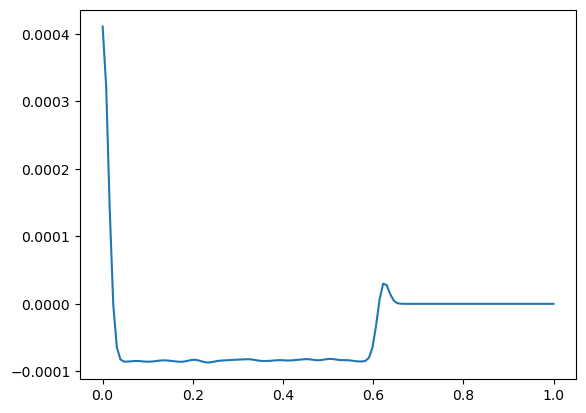

In [134]:
# Plot the zeroth-order scattering coefficient
zerovec=np.array(Sx[0])
time=np.linspace(0, 1, 128)
plt.plot(time, zerovec)

C:\Users\fayza\AppData\Local\Temp\ipykernel_16900\3821135465.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(time), Sx[i])


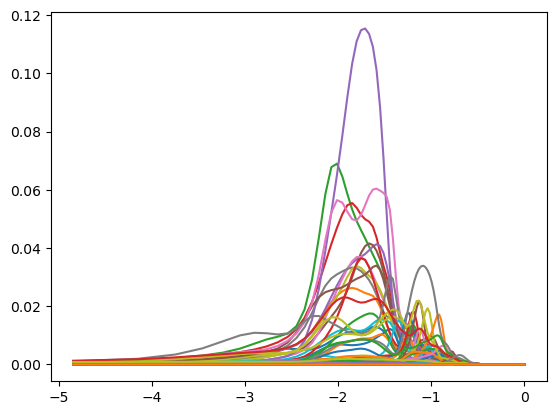

In [135]:
# Plot the first-order scattering coefficients
for i in range(1, 63):
    plt.plot(np.log(time), Sx[i])



C:\Users\fayza\AppData\Local\Temp\ipykernel_16900\1510470181.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(time), Sx[i])


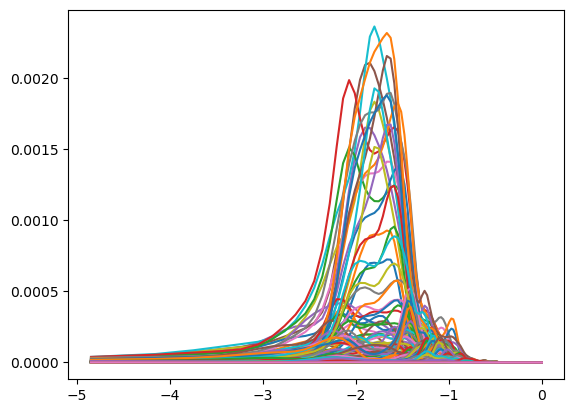

In [136]:
# Plot the first-order scattering coefficients
for i in range(64, 221):
    plt.plot(np.log(time), Sx[i])